<div style="text-align: left;" role="presentation">
<h1 role="presentation"><strong><span role="presentation">Lecci&oacute;n 4 y 5: Miércoles 11 de Marzo</span></strong></h1>

## Transformación de Ondulación (Rippling)
* Sea $A$ una imágen de tamaño ${m\times n}$. Consideremos la imágen $B$ de tamaño ${m\times n}$, definida por la siguiente regla

$$B({x}', {y}') = B(T_{x}(x, y), T_{y}(x, y))$$

donde 

$${x}' = T_{x}(x, y) = x + A_{x}*sin(2{\pi}y/L_{x})$$
$${y}' = T_{y}(x, y) = y + A_{y}*sin(2{\pi}x/L_{y})$$

donde $x, y$ son las entradas de la imágen $A$. $L_{x}, L_{y}$ son constantes de periódo de ondulación y $A_{x}, A_{y}$ son constantes de amplitud.

In [2]:
function Y = rippling(A,Lx,Ly,Ax,Ay)
  [m,n,r] = size(A);
  Y = zeros(m,n,r);
  Y=uint8(Y);
  
   for x=1:m
    for y=1:n
      xnew = mod(round(x + Ax * sin((2*pi*y)/Lx)),m);
      ynew = mod(round(y + Ay * sin((2*pi*x)/Ly)),n);
      Y(xnew+1,ynew+1,:) = A(x,y,:);
    endfor
  endfor
endfunction

In [4]:
function B = limpiar(A)
  #A es la matriz a la cual de le hara limpieza
  [m,n,r] = size(A);
  A = im2double(A);
  B = A;
  for x=1:m
    for y=1:n
     if or((A(x,y,1) == 0), (A(x,y,2) == 0), (A(x,y,3) == 0))
       if and(x==1, y==1)
        newpixel = (A(x,y+1,:)+A(x+1,y,:)+A(x+1,y+1,:))/3;
       elseif and(x==m,y==1)
         newpixel = (A(x-1,y,:)+A(x-1,y+1,:)+A(x,y+1,:))/3;
       elseif and(x==1,y==n)
         newpixel = (A(x,y-1,:)+A(x+1,y-1,:)+A(x+1,y,:))/3;
       elseif and(x==m,y==n)
         newpixel = (A(x-1,y,:)+A(x-1,y-1,:)+A(x,y-1,:))/3;
       elseif and(x>1,y>1,x<m,y<n)
         newpixel = (A(x-1,y-1,:)+A(x,y-1,:)+A(x+1,y-1,:)+A(x+1,y,:)+A(x+1,y+1,:)+A(x,y+1,:)+A(x-1,y+1,:)+A(x-1,y,:))/8;
       elseif y==1
         newpixel = (A(x-1,y,:)+A(x-1,y+1,:)+A(x,y+1,:)+A(x+1,y+1,:)+A(x+1,y,:))/5;
       elseif x==1
         newpixel = (A(x,y-1,:)+A(x+1,y-1,:)+A(x+1,y,:)+A(x+1,y+1,:)+A(x,y+1,:))/5;
       elseif x==m
         newpixel = (A(x,y-1,:)+A(x-1,y-1,:)+A(x-1,y,:)+A(x-1,y+1,:)+A(x,y+1,:))/5;
       elseif y==n
         newpixel = (A(x-1,y,:)+A(x-1,y-1,:)+A(x,y-1,:)+A(x+1,y-1,:)+A(x+1,y,:))/5;
       endif
       B(x,y,:) = newpixel(1,1,:);
     else
       continue
     endif
       
    endfor
  endfor
  
endfunction

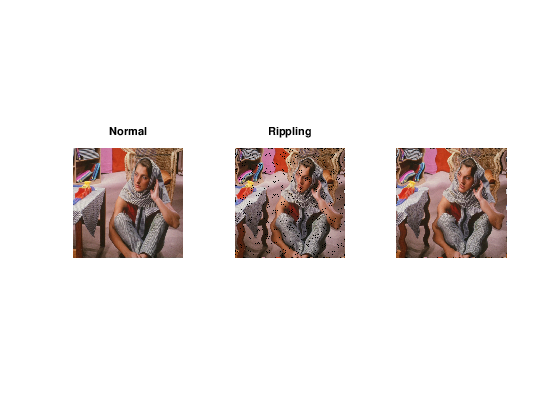

In [5]:
clc; clear;
pkg load image

A = imread('files/barbara.jpg');

B = rippling(A,75,75,5,5);

C = limpiar(B); 

subplot(1,3,1) 
imshow(A)
title('Normal')

subplot(1,3,2)
imshow(B)
title('Rippling')

subplot(1,3,3)
imshow(C)
title('Rippling limpio')
imshow(C);

In [8]:
clc; clear;
pkg load image
pkg load video

maximg = 200;

rango = 5:5:maximg;

A = imread('files/barbara.jpg');
A = imresize(A,[256, 256]);

video = VideoWriter('files/Video2.avi');
open(video);
for k = rango
  B = rippling(A,75,75,k,k);
  
  for j = 1:7
    writeVideo(video, B);
  endfor
endfor
close(video);